<a href="https://colab.research.google.com/github/Minal309/FINTECH-CHURN-ANALYSIS-USING-HYPOTHESIS-TESTING-AND-CHURN-RATE/blob/main/ChurnAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##FINTECH CHURN ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Bank-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.shape

(10000, 18)

In [47]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

##There are no null values in the dataset.

###We can drop certain columns which do not affect the churn analysis like CustomerId, RowNumber and Surname

In [6]:
new_df =  df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
new_df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
new_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


<Axes: xlabel='AgeGroup'>

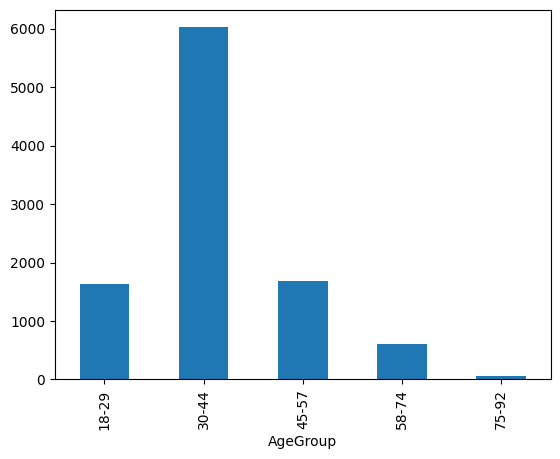

In [10]:
age_bins = [18,30,45,58,75,93]
age_labels = ['18-29','30-44','45-57','58-74','75-92']

# Create AgeGroup column based on age brackets
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count customers in each age group
age_counts = df['AgeGroup'].value_counts().sort_index()
age_counts.plot(kind='bar')

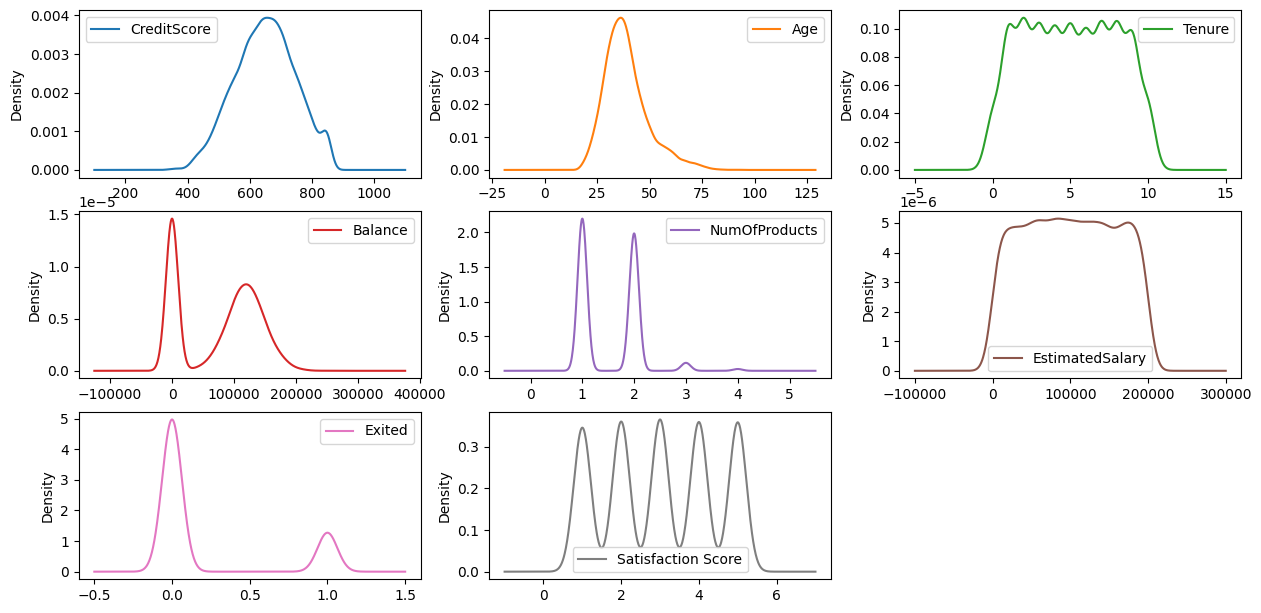

In [54]:
plt.rcParams["figure.figsize"] = (15,10)
new_df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Exited','Satisfaction Score']].plot(kind = 'density', subplots = True, layout = (4,3), sharex = False)
plt.show()

<ipython-input-56-a7be38437eae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = new_df, x = 'Geography', ax = axs[0,0], palette = "tab10")
<ipython-input-56-a7be38437eae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = new_df, x = 'Gender', ax = axs[0,1], palette = "tab10")
<ipython-input-56-a7be38437eae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = new_df, x = 'NumOfProducts', ax = axs[0,2], palette = "tab10")
<ipython-input-56-a7be38437eae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is de

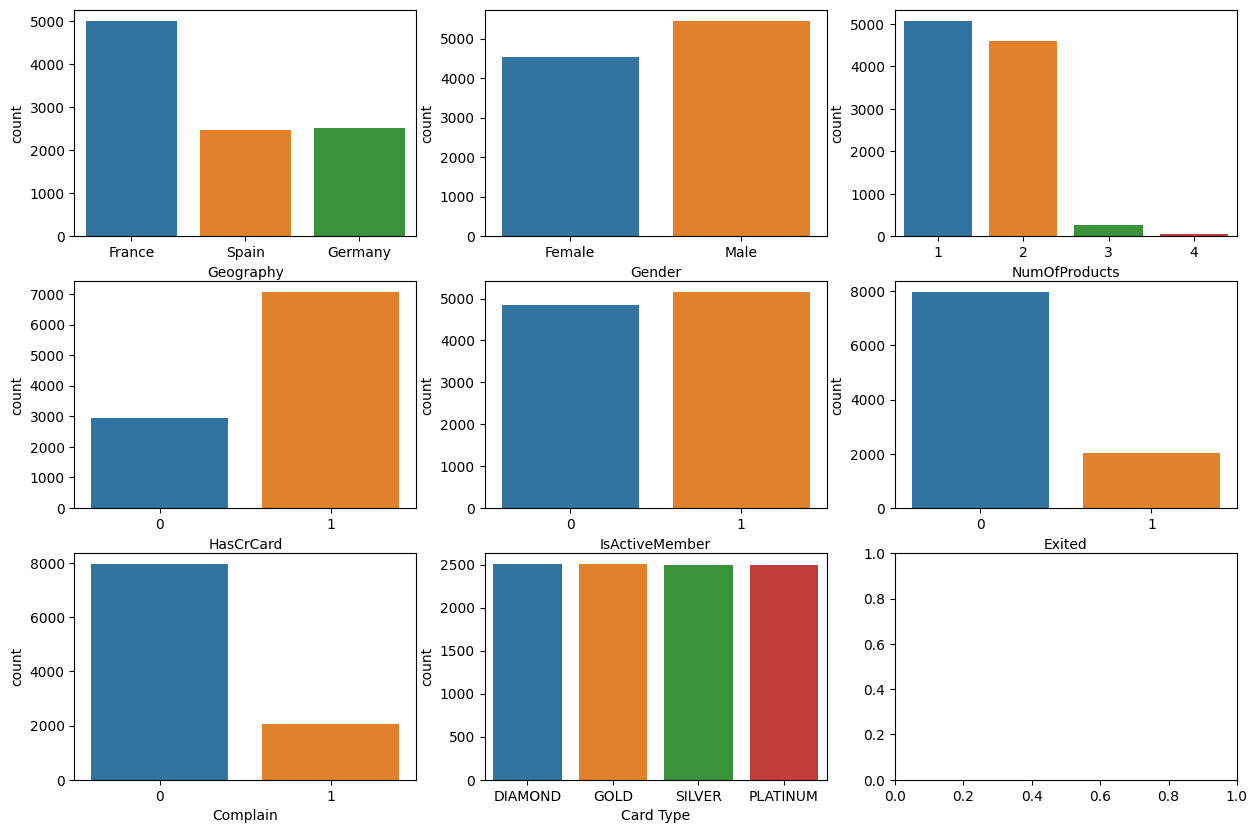

In [56]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
sns.countplot(data = new_df, x = 'Geography', ax = axs[0,0], palette = "tab10")
sns.countplot(data = new_df, x = 'Gender', ax = axs[0,1], palette = "tab10")
sns.countplot(data = new_df, x = 'NumOfProducts', ax = axs[0,2], palette = "tab10")
sns.countplot(data = new_df, x = 'HasCrCard', ax = axs[1,0], palette = "tab10")
sns.countplot(data = new_df, x = 'IsActiveMember', ax = axs[1,1], palette = "tab10")
sns.countplot(data = new_df, x = 'Exited', ax = axs[1,2], palette = "tab10")
sns.countplot(data = new_df, x = 'Complain', ax = axs[2,0], palette = "tab10")
sns.countplot(data = new_df, x = 'Card Type', ax = axs[2,1], palette = "tab10")
plt.show()

In [11]:
new_df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

##The above plots show following(which can be further evaluated with hypothesis testing)
###Credit Score shows a normal like distribution.
###There are almost equal number of customers in all tenures.
###Most customers prefer 1 or 2 number of products.
###Most of the customers have balances centered around 0.
### Most of the customers are in the age range of 30 to 44.

##BIVARIATE ANALYSIS

<Axes: xlabel='Gender', ylabel='count'>

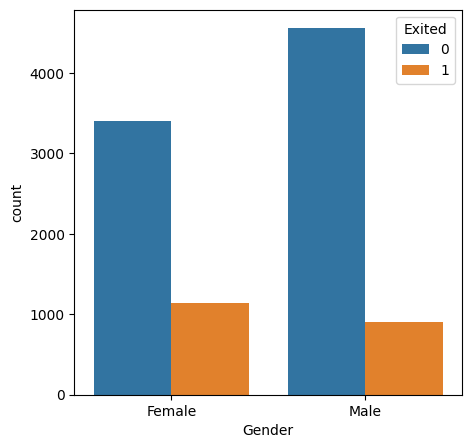

In [58]:
#Number of Exited customers as per the Gender
plt.figure(figsize=(5,5))
sns.countplot(data = new_df, x = 'Gender', hue = 'Exited')

<Axes: xlabel='Satisfaction Score', ylabel='count'>

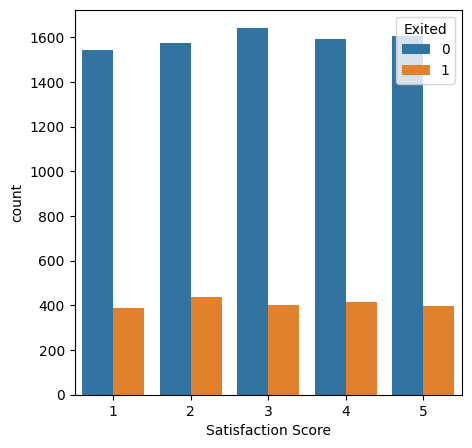

In [59]:
#Number of Exited customers as per the Satisfaction score
plt.figure(figsize=(5,5))
sns.countplot(data = new_df, x = 'Satisfaction Score', hue = 'Exited')

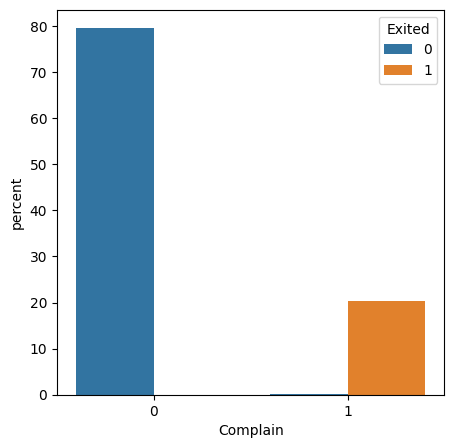

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(data = new_df, x = 'Complain', hue = 'Exited', stat='percent')
plt.show()

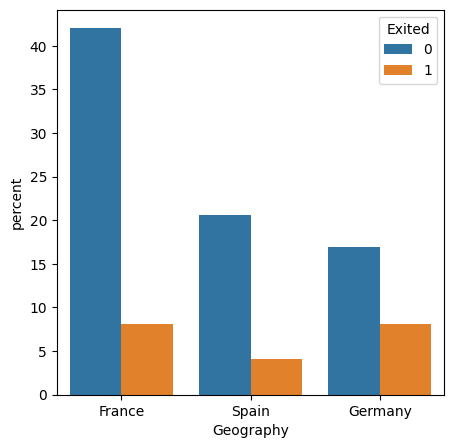

In [61]:
#Number of Exited customers as per the Gender
plt.figure(figsize=(5,5))
sns.countplot(data = new_df, x = 'Geography', hue = 'Exited',stat='percent')
plt.show()

##Churn Rate

In [68]:
print("Value Counts: ",df['Geography'].value_counts())
geography_cr = df.groupby('Geography')['Exited'].mean() * 100
print("Churn Rate as per the Geography: ", geography_cr)

Value Counts:  Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Churn Rate as per the Geography:  Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


##France has most number of customers among all three geographies whereas the churn rate is more for Germany.

In [66]:
print("Value Counts: ",df['NumOfProducts'].value_counts())
num_products_cr = df.groupby('NumOfProducts')['Exited'].mean() * 100
print("Churn Rate as per the Number of Products: ", num_products_cr)

Value Counts:  NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
Churn Rate as per the Number of Products:  NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


##Most cusotmers prefer 1 Product whereas the churn rate is more for customers having 3 or more number of products.


In [65]:
print("Value Counts: ",df['Complain'].value_counts())
complain_cr = df.groupby('Complain')['Exited'].mean() * 100
print("Churn Rate as per the Number of Complains: ", complain_cr)

Value Counts:  Complain
0    7956
1    2044
Name: count, dtype: int64
Churn Rate as per the Number of Complains:  Complain
0     0.050277
1    99.510763
Name: Exited, dtype: float64


##99% of the customers who complain have exited.

In [64]:
print("Value Counts: ",df['HasCrCard'].value_counts())
has_credit_card_cr = df.groupby('HasCrCard')['Exited'].mean() * 100
print("Churn Rate as per the Number of Credit Card Availability: ", has_credit_card_cr)

Value Counts:  HasCrCard
1    7055
0    2945
Name: count, dtype: int64
Churn Rate as per the Number of Credit Card Availability:  HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64


##Churn Rate is almost the same for customers havnig credit card or not. whereas there are more number of customers who are having the credit card

In [70]:
print("Value Counts: ",df['Gender'].value_counts())
gender_cr = df.groupby('Gender')['Exited'].mean() * 100
print("Churn Rate as per the Gender: ", gender_cr)

Value Counts:  Gender
Male      5457
Female    4543
Name: count, dtype: int64
Churn Rate as per the Gender:  Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


##The number of Male customers are slightly more than the female customers whereas the churn rate is seen more in the Female customers.

In [75]:
#numerical columns:
CreditScore_cr = df[df['Exited'] == 1]['CreditScore'].mean() * 100
print(f'Credit Score for customers who exited : {np.round(CreditScore_cr, 3)}')

CreditScore_cr = df[df['Exited'] == 0]['CreditScore'].mean() * 100
print(f'Credit Score for customers who have not exited : {np.round(CreditScore_cr,3)}')

Credit Score for customers who exited : 64541.462
Credit Score for customers who have not exited : 65183.785


##The credit score seems to be almost same for the the exited and the non exited customers.

In [76]:
print("Value Counts: ",df['Card Type'].value_counts())
card_type_cr = df.groupby('Card Type')['Exited'].mean() * 100
print("Churn Rate as per the type of the card: ", card_type_cr)

Value Counts:  Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
Churn Rate as per the type of the card:  Card Type
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
Name: Exited, dtype: float64


##The churn rate seems to be almost similar for all the types of the card.

In [81]:
estimated_salary_cr = round((df[df['Exited'] == 1]['EstimatedSalary'].mean() * 100),2)
print(f' Estimated salary for churned customers: {estimated_salary_cr}')

estimated_salary_non_cr = round((df[df['Exited'] == 0]['EstimatedSalary'].mean() * 100),2)
print(f' Estimated salary for non churned customers:{estimated_salary_non_cr}')

 Estimated salary for churned customers: 10150990.88
 Estimated salary for non churned customers:9972685.31


In [12]:
# Calculate churn rate by IsActiveMember
activity_cr = df.groupby('IsActiveMember')['Exited'].mean() * 100
print(f"Churn Rate by Activity Level:{activity_cr}")

Churn Rate by Activity Level:IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


##Churn rate seems to be comparatively high for the  members who are not Active.

##Converting some column to categorical for analysis

In [77]:
new_df['HasCrCard'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)
new_df['IsActiveMember'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)
new_df['Exited'].replace({0 : 'NonActive', 1 : 'Active'}, inplace = True)

In [40]:
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Active,1,2,DIAMOND,464,30-44
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,NonActive,1,3,DIAMOND,456,30-44
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Active,1,3,DIAMOND,377,30-44
3,699,France,Female,39,1,0.00,2,No,No,93826.63,NonActive,0,5,GOLD,350,30-44
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,NonActive,0,5,GOLD,425,30-44



##Box plots to check for outliers

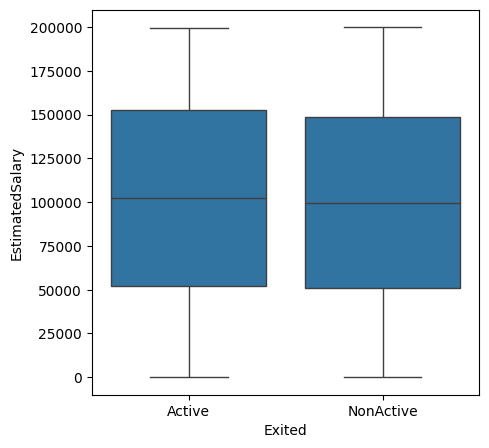

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data = new_df, y = 'EstimatedSalary', x = 'Exited')
plt.show()

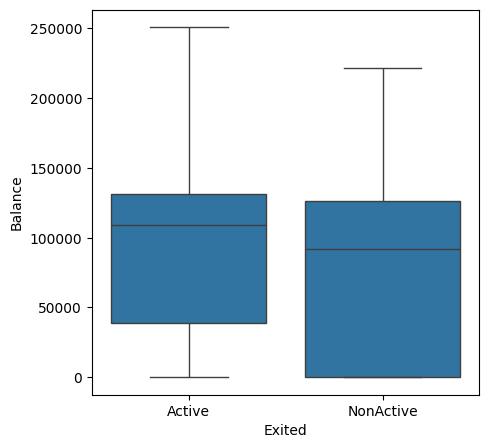

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data = new_df, y = 'Balance', x = 'Exited')
plt.show()

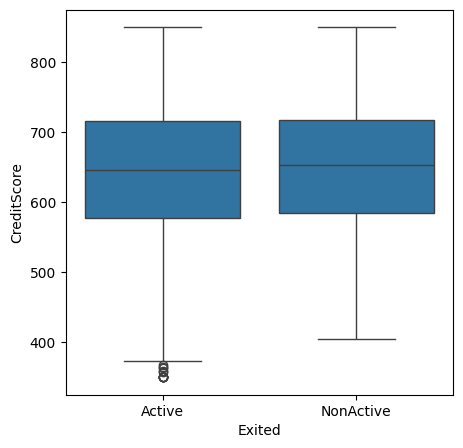

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data = new_df, x = 'Exited', y = 'CreditScore')
plt.show()

##The data seems to be left skewed. The box plot shows that most people who exited has balance on lower side.

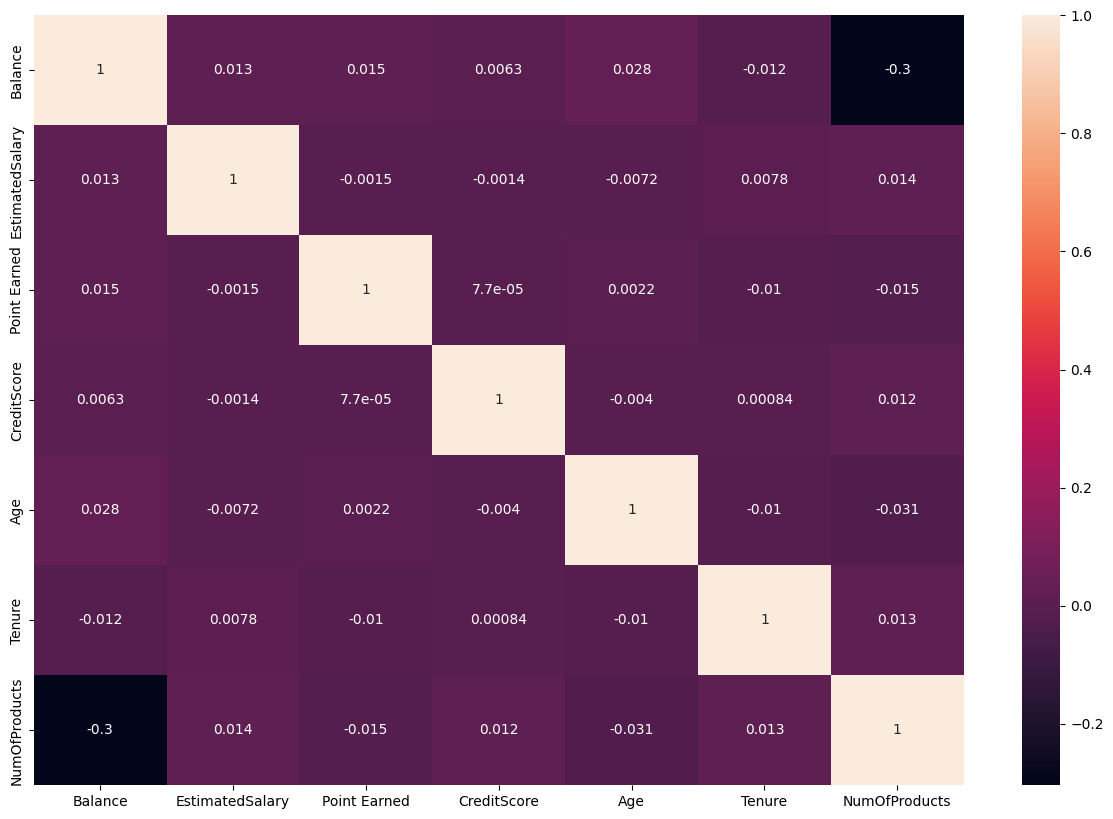

In [25]:
numeric_corr = ['Balance','EstimatedSalary', 'Point Earned', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts']
corr = df[numeric_corr].corr()
sns.heatmap(data = corr, annot = True)
plt.show()

##Here the column Exited is the target variable which may be based on various dependent columns like :
- CreditScore
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Complain
- Satisfaction Score
- Point Earned'

##Which columns are affecting the column 'Exited ' can be found using some Hypothesis Testing.


###IS THERE ANY RELATION BETWEEN CUSTOMERS EXITING AND THEM HAVING A CREDIT CARD ?

###H0: A customer having credit card has no relation with him/her exiting.
###Ha: Having credit card and exit of customers are related.

In [78]:

from scipy.stats import chi2_contingency

table = pd.crosstab(new_df['HasCrCard'], df['Exited'])
stat, p_val, dof, expected = chi2_contingency(table)
alpha = 0.05
print("P-value = ",p_val)
if p_val < alpha:
    print("Reject Null Hypothesis. A customer having credit card has relation with him/her exiting.")
else:
    print("Fail to reject null Hypothesis. Having Credit card is not related to customer exiting.")

P-value =  0.5026181509009862
Fail to reject null Hypothesis. Having Credit card is not related to customer exiting.


###IS THERE ANY RELATION BETWEEN CUSTOMERS EXITING AND GENDER?

###H0: Gender has no effect on customers exiting.
###Ha: Gender has effect on customers exiting.

In [16]:
from scipy.stats import chi2_contingency

table = pd.crosstab(new_df['Gender'], df['Exited'])
stat, p_val, dof, expected = chi2_contingency(table)
alpha = 0.05
print("P-value = ",p_val)
if p_val < alpha:
    print("Reject Null Hypothesis. Gender has effect on customers exiting.")
else:
    print("Fail to reject null Hypothesis. Gender has no effect on customers exiting.")

P-value =  2.9253677618642e-26
Reject Null Hypothesis. Gender has effect on customers exiting.


##IS THERE ANY RELATION BETWEEN CUSTOMERS EXITING AND THE CARD TYPE BEING USED?
###The card type column has 4 different categories. So we can us ANOVA to check our hypothesis.
####(** Here we are assuming that the conditions are met met for the ANOVA)
###H0 : There is no relation between Card type and the customers exiting.
###Ha : There is a relation between Card type and the customers exiting.


In [14]:
from scipy.stats import kruskal, f_oneway

A = df[df['Card Type'] == 'SILVER']['Exited']
B = df[df['Card Type'] == 'GOLD']['Exited']
C = df[df['Card Type'] == 'DIAMOND']['Exited']
D = df[df['Card Type'] == 'PLATINUM']['Exited']

f_stat, p_val = f_oneway(A,B,C,D)
print("test statistic:",f_stat)
print("p_value:",p_val)
if p_val <0.05:
    print("Reject Null Hypothesis. there is a relation between the card type and the customers exiting.")
else:
    print("Fail to reject null Hypothesis. There exist no relation between the card type and the customers exiting.")

test statistic: 1.6845851710744535
p_value: 0.16797638469961967
Fail to reject null Hypothesis. There exist no relation between the card type and the customers exiting.


##IS THERE ANY RELATION BETWEEN CUSTOMERS EXITING AND THE NUMBER OF PRODUCT BEING BOUGHT BY THEM

###H0 : Number of products being bought does not affect the customers exiting
###Ha : There is a relation between number of products being bought and the custiomers exiting.

In [20]:
A = df[df['NumOfProducts'] == 1]['Exited']
B = df[df['NumOfProducts'] == 2]['Exited']
C = df[df['NumOfProducts'] == 3]['Exited']
D = df[df['NumOfProducts'] == 4]['Exited']

f_stat, p_val = f_oneway(A,B,C,D)
print("test statistic:",f_stat)
print("p_value:",p_val)
if p_val <0.05:
    print("Reject Null Hypothesis. there is a relation between the Number of products that are bought by the customer and the customers exiting.")
else:
    print("Fail to reject null Hypothesis. there is no relation between the Number of products that are bought by the customer and the customers exiting.")

test statistic: 588.6941153775092
p_value: 0.0
Reject Null Hypothesis. there is a relation between the Number of products that are bought by the customer and the customers exiting.


##IS THERE ANY RELATION BETWEEN CUSTOMERS EXITING AND IF THE CUSTOPMER IS ACTIBVE OR NOT

###H0 : If the member is active or not does not affect the customers exiting
###Ha : There is a relation between the custiomers exiting and if he/she is active or not.

In [17]:
contingency_table = pd.crosstab(df['IsActiveMember'], df['Exited'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("p-value = ", p_value)

alpha = 0.05 # Significance level

# Interpret the results
if p_value < alpha:
    print("We reject the null hypothesis. There is an association betweeen Active Customer and the customer exiting the bank.")
else:
    print("We fail to reject the null hypothesis. There is no association betweeen Active Customer and the customer exiting the bank.")

p-value =  6.153167438113408e-55
We reject the null hypothesis. There is an association betweeen Active Customer and the customer exiting the bank.


##TO TEST IF THERE IS A SIGNIFICANT DIFFERENCE BETWEEN THE MEAN AGES OF THE CUSTOMERS WHOI EXITED AND WHO DID NOT?
###H0: There is no significant difference in mean age between customers who exited and those who did not.
###Ha: There is a significant difference in mean age between customers who exited and those who did not.

In [25]:
from scipy.stats import ttest_ind

exited = df[df['Exited'] == 1]['Age']
not_exited = df[df['Exited'] == 0]['Age']

print("Mean age of customers exited : ", exited.mean())
print("Mean age of customers did not exit : ", not_exited.mean())

t_statistic, p_value = ttest_ind(exited, not_exited)

print("Test statistics : ", p_value)
# Set significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in mean age between customers who exited and those who did not.")
else:
    print(" we fail to reject the null hypothesis. There is no significant difference in mean age between customers who exited and those who did not.")

Mean age of customers exited :  44.83562315996075
Mean age of customers did not exit :  37.40806330067822
Test statistics :  1.3467162476197306e-186
We reject the null hypothesis. There is a significant difference in mean age between customers who exited and those who did not.


##TO TEST IF THERE IS A SIGNIFICANT DIFFERENCE BETWEEN THE BALANCE OF THE CUSTOMERS WHO EXITED AND WHO DID NOT?
###H0: There is no significant difference in mean balance between customers who exited and those who did not.
###Ha: There is a significant difference in mean balance between customers who exited and those who did not.



In [24]:

exited = df[df['Exited'] == 1]['Balance']
not_exited = df[df['Exited'] == 0]['Balance']

print("Mean balance when customers exited : ", exited.mean())
print("Mean balance when customers did not exit : ", not_exited.mean())

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(exited, not_exited)

# Print results
print('Two-Sample T-Test Results:')
print(f'T-statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Set significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in mean balance between customers who exited and those who did not.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in mean balance between customers who exited and those who did not.")

Mean balance when customers exited :  91109.47600588812
Mean balance when customers did not exit :  72742.75066314996
Two-Sample T-Test Results:
T-statistic: 11.9407
P-value: 0.0000
We reject the null hypothesis. There is a significant difference in mean balance between customers who exited and those who did not.


##Suggestions Based on the Insights :

- We see that there is a relation between the gender of the customer and him/ her exiting. We also know that there are more number of Female customers who are  exiting , we should focus on retention of them. There should be some specific offers for female customers.

- Since more than 40% customers are from France, but We see that the churn rate is more in Germany. So we can focus on marketing campaigns in Germany and Spain to boost customer acquisition .

- We see that 99% of customers who filed complaints have exited the bank , which indicates the that complain resolution strategy is not in place and that the customers are not at all satisfies and so exit. The bank must focus on revampling these srrategies.

- There is a significant difference in mean balance between customers who exited and those who did not. Customers who exited shows a higher balance . Does this mean that they are getting better benefits or offers at other banks due to which they are exiting. An investoigation of this needs to be done to see if if we can come up with some better counter offers for retention.

- The kde plot of Balance also shows that there are a lot of accounts who have zero balancae. Tha bank needs to investigate this.

- There is a relation between the Number of products that are bought by the customer and the customers exiting. There is more attrition for customers having more than 2 number of products. Though the count of such customwers is very low, but this issue can still be looked upon to be solved.

- Most of the customers are in the age group of 35 to 44. The bank can come up with strategies to attract the other age groups as well.



##I